In [5]:
import pandas as pd

# Load the dataset
wine_reviews = pd.read_csv('wine-review.csv')

# Check basic properties of the dataset
num_rows, num_columns = wine_reviews.shape
data_types = wine_reviews.dtypes
first_few_rows = wine_reviews.head()

num_rows, num_columns, data_types, first_few_rows

(129971,
 14,
 Unnamed: 0                 int64
 country                   object
 description               object
 designation               object
 points                     int64
 price                    float64
 province                  object
 region_1                  object
 region_2                  object
 taster_name               object
 taster_twitter_handle     object
 title                     object
 variety                   object
 winery                    object
 dtype: object,
    Unnamed: 0   country                                        description  \
 0           0     Italy  Aromas include tropical fruit, broom, brimston...   
 1           1  Portugal  This is ripe and fruity, a wine that is smooth...   
 2           2        US  Tart and snappy, the flavors of lime flesh and...   
 3           3        US  Pineapple rind, lemon pith and orange blossom ...   
 4           4        US  Much like the regular bottling from 2012, this...   
 
                  

In [6]:
# Identify columns with missing values and count them
missing_values = wine_reviews.isnull().sum()
missing_values_percentage = (missing_values / num_rows) * 100
missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percentage (%)': missing_values_percentage})

# Filter out columns with no missing values for clarity
missing_data = missing_data[missing_data['Missing Values'] > 0]
missing_data.sort_values(by='Missing Values', ascending=False)

,Missing Values,Percentage (%)
region_2,79460,61.136715
designation,37465,28.825661
taster_twitter_handle,31213,24.015357
taster_name,26244,20.192197
region_1,21247,16.347493
price,8996,6.921544
country,63,0.048472
province,63,0.048472
variety,1,0.000769


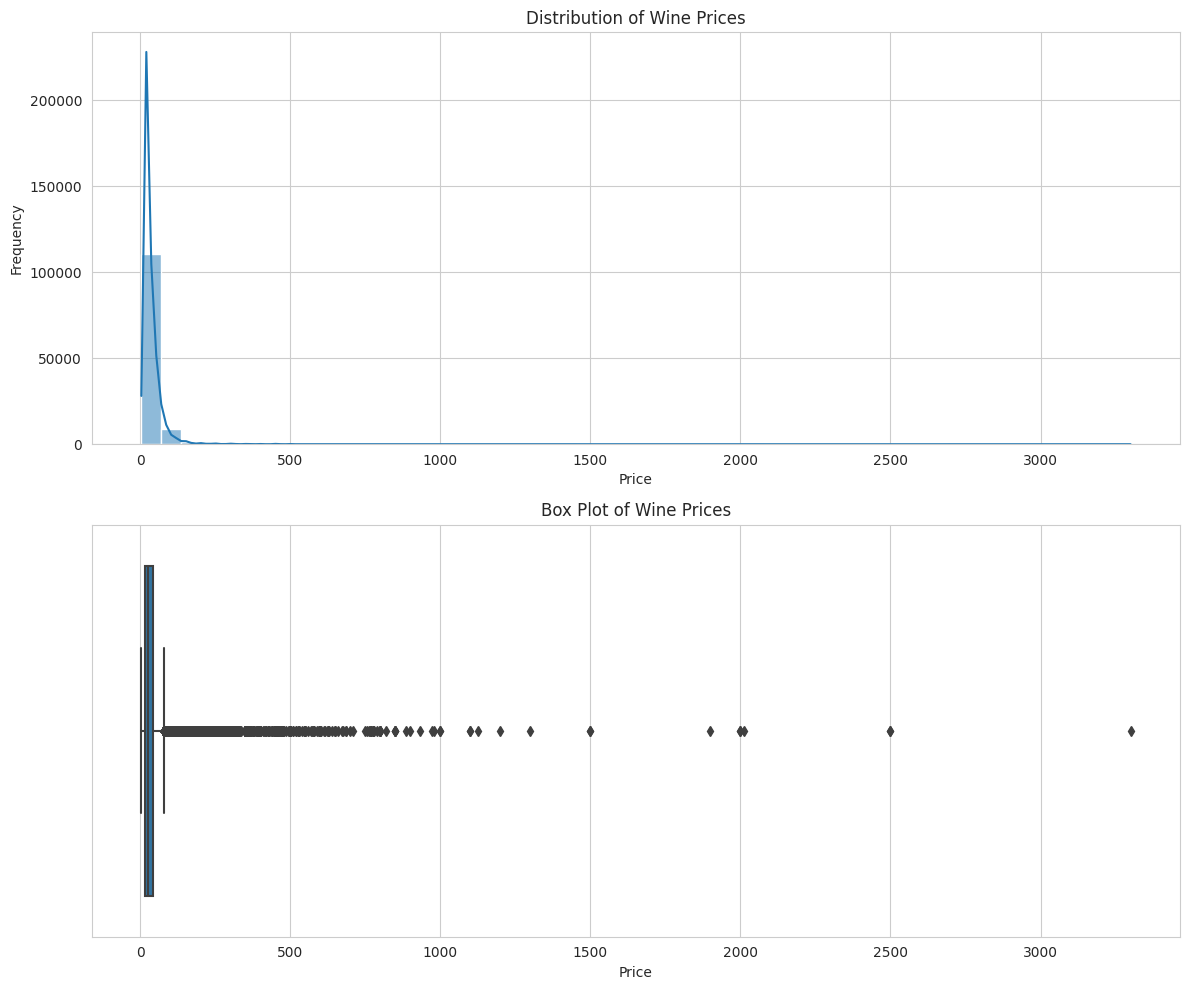

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetics for the plots
sns.set_style("whitegrid")

fig, ax = plt.subplots(2, 1, figsize=(12, 10))

# Histogram
sns.histplot(wine_reviews['price'], bins=50, kde=True, ax=ax[0])
ax[0].set_title('Distribution of Wine Prices')
ax[0].set_xlabel('Price')
ax[0].set_ylabel('Frequency')

# Boxplot
sns.boxplot(x=wine_reviews['price'], ax=ax[1])
ax[1].set_title('Box Plot of Wine Prices')
ax[1].set_xlabel('Price')

plt.tight_layout()
plt.show()

In [8]:
# 1. Impute missing values in the price column using the median
price_median = wine_reviews['price'].median()
wine_reviews['price'].fillna(price_median, inplace=True)

# 2. Drop rows with missing values for columns with very low percentage of missing data
wine_reviews.dropna(subset=['country', 'province', 'variety'], inplace=True)

# Check the updated number of missing values for verification
updated_missing_values = wine_reviews.isnull().sum()
updated_missing_data = pd.DataFrame({'Updated Missing Values': updated_missing_values})
updated_missing_data = updated_missing_data[updated_missing_data['Updated Missing Values'] > 0]
updated_missing_data.sort_values(by='Updated Missing Values', ascending=False)

,Updated Missing Values
region_2,79396
designation,37453
taster_twitter_handle,31212
taster_name,26243
region_1,21183


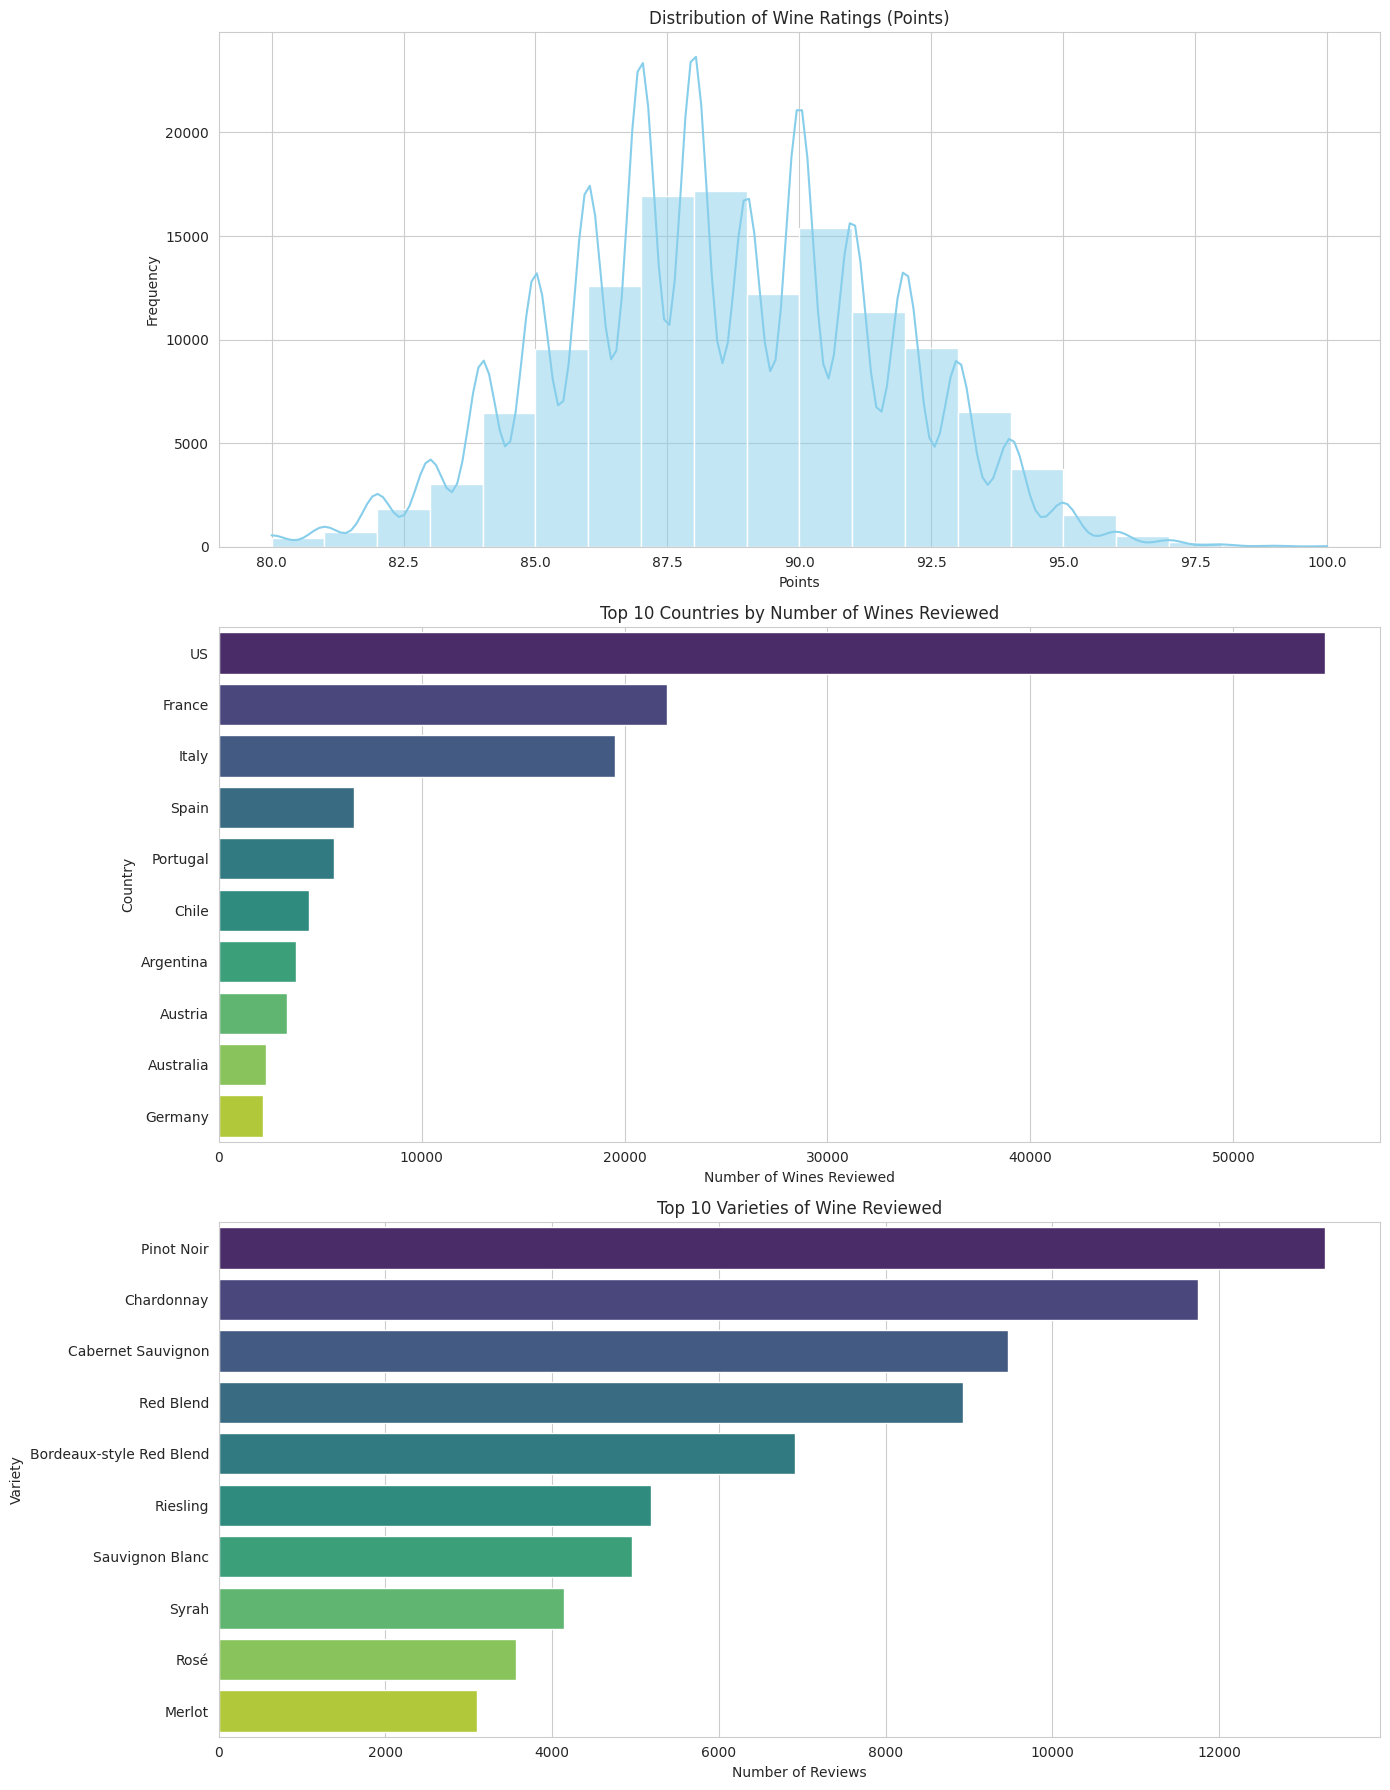

In [9]:
fig, ax = plt.subplots(3, 1, figsize=(14, 18))

# 1. Distribution of points
sns.histplot(wine_reviews['points'], bins=20, kde=True, ax=ax[0], color='skyblue')
ax[0].set_title('Distribution of Wine Ratings (Points)')
ax[0].set_xlabel('Points')
ax[0].set_ylabel('Frequency')

# 2. Top 10 countries by number of wines reviewed
top_countries = wine_reviews['country'].value_counts().head(10)
sns.barplot(x=top_countries.values, y=top_countries.index, ax=ax[1], palette='viridis')
ax[1].set_title('Top 10 Countries by Number of Wines Reviewed')
ax[1].set_xlabel('Number of Wines Reviewed')
ax[1].set_ylabel('Country')

# 3. Top 10 varieties of wine reviewed
top_varieties = wine_reviews['variety'].value_counts().head(10)
sns.barplot(x=top_varieties.values, y=top_varieties.index, ax=ax[2], palette='viridis')
ax[2].set_title('Top 10 Varieties of Wine Reviewed')
ax[2].set_xlabel('Number of Reviews')
ax[2].set_ylabel('Variety')

plt.tight_layout()
plt.show()

<ipython-input-10-7fd425bc964f>:12: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  country_avg = wine_reviews[wine_reviews['country'].isin(top_countries_list)].groupby('country').mean().sort_values(by='points', ascending=False)
<ipython-input-10-7fd425bc964f>:23: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  varieties_avg_price = wine_reviews[wine_reviews['variety'].isin(top_varieties_list)].groupby('variety').mean().sort_values(by='price', ascending=False)


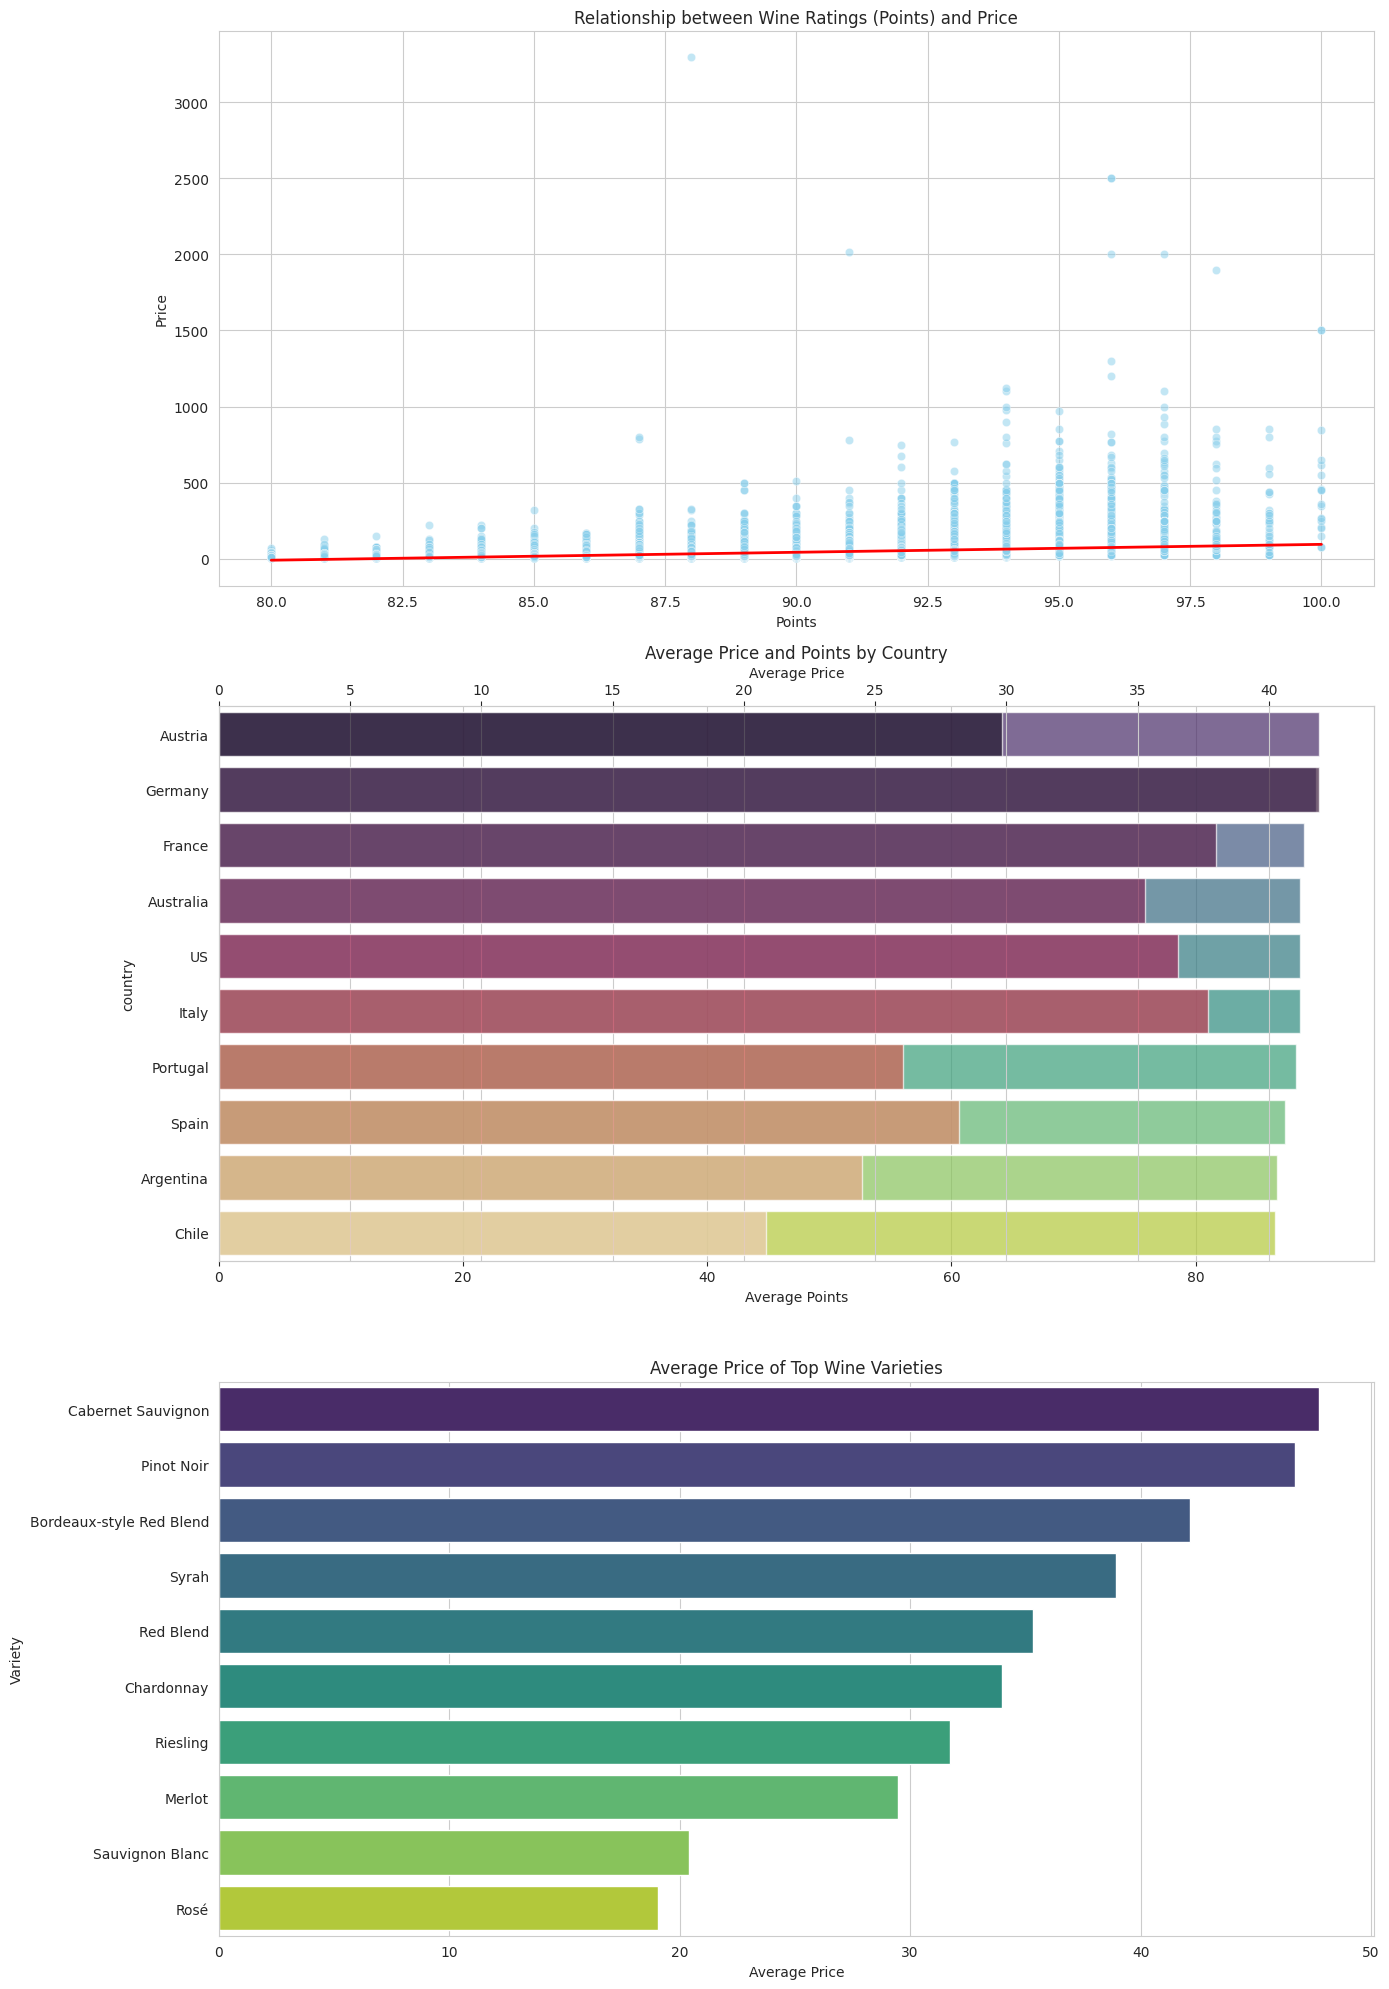

In [10]:
fig, ax = plt.subplots(3, 1, figsize=(14, 20))

# 6.1 Relationship between points and price
sns.scatterplot(data=wine_reviews, x='points', y='price', alpha=0.5, ax=ax[0], color='skyblue')
sns.regplot(data=wine_reviews, x='points', y='price', scatter=False, ax=ax[0], color='red', line_kws={'linewidth':2})
ax[0].set_title('Relationship between Wine Ratings (Points) and Price')
ax[0].set_ylabel('Price')
ax[0].set_xlabel('Points')

# 6.2 Average price and points by country
top_countries_list = top_countries.index.tolist()
country_avg = wine_reviews[wine_reviews['country'].isin(top_countries_list)].groupby('country').mean().sort_values(by='points', ascending=False)
country_avg.reset_index(inplace=True)
sns.barplot(data=country_avg, y='country', x='points', ax=ax[1], palette='viridis', alpha=0.7)
ax2 = ax[1].twiny()
sns.barplot(data=country_avg, y='country', x='price', ax=ax2, palette='rocket', alpha=0.7)
ax[1].set_xlabel('Average Points')
ax2.set_xlabel('Average Price')
ax[1].set_title('Average Price and Points by Country')

# 6.3 Variety of wine vs. average price
top_varieties_list = top_varieties.index.tolist()
varieties_avg_price = wine_reviews[wine_reviews['variety'].isin(top_varieties_list)].groupby('variety').mean().sort_values(by='price', ascending=False)
sns.barplot(data=varieties_avg_price, y=varieties_avg_price.index, x='price', ax=ax[2], palette='viridis')
ax[2].set_title('Average Price of Top Wine Varieties')
ax[2].set_xlabel('Average Price')
ax[2].set_ylabel('Variety')

plt.tight_layout()
plt.show()


<ipython-input-11-52d2e3cef847>:7: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.swarmplot(data=sample_data, x='country', y='points', ax=ax[0], palette='viridis')
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 60.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 34.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 19.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
<ipython-input-11-52d2e3cef847>:14: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(data=sample_data, 

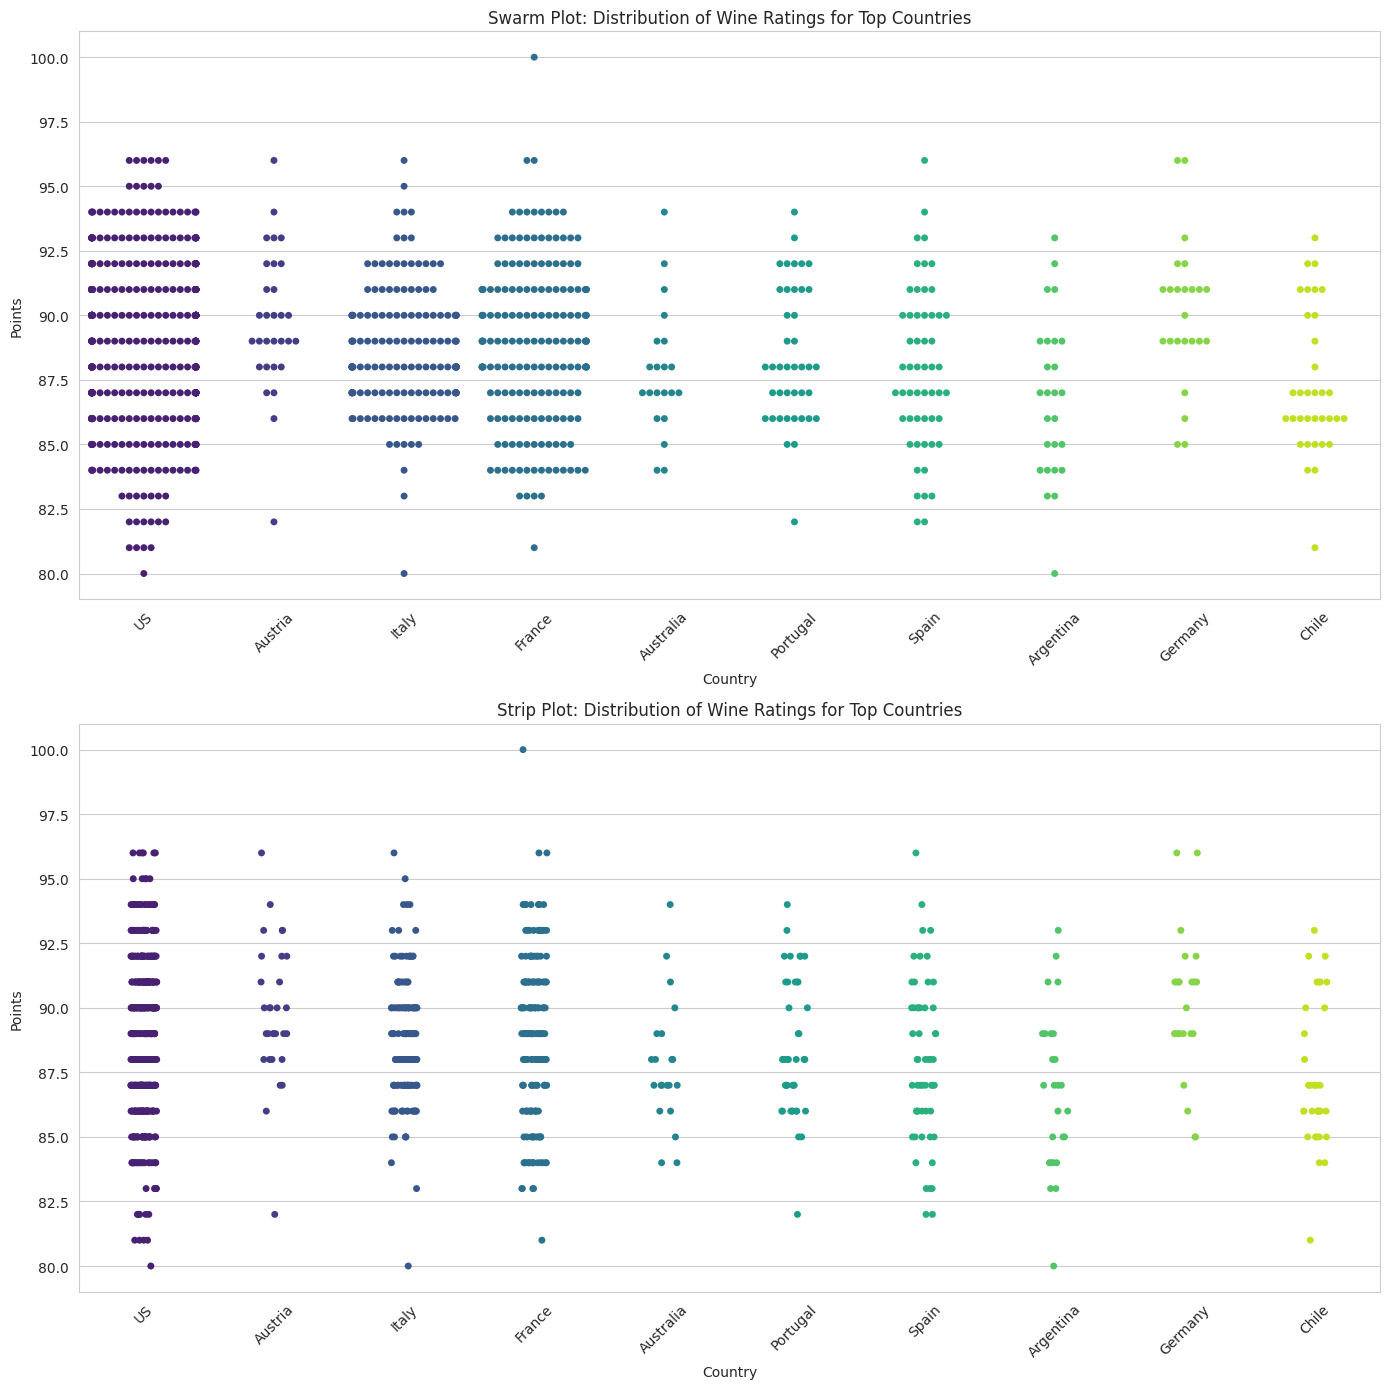

In [11]:
# Sample a subset of the data for performance
sample_data = wine_reviews[wine_reviews['country'].isin(top_countries_list)].sample(1000, random_state=42)

fig, ax = plt.subplots(2, 1, figsize=(14, 14))

# Swarm Plot for distribution of points for top countries
sns.swarmplot(data=sample_data, x='country', y='points', ax=ax[0], palette='viridis')
ax[0].set_title('Swarm Plot: Distribution of Wine Ratings for Top Countries')
ax[0].set_xlabel('Country')
ax[0].set_ylabel('Points')
ax[0].tick_params(axis='x', rotation=45)

# Strip Plot for distribution of points for top countries
sns.stripplot(data=sample_data, x='country', y='points', ax=ax[1], jitter=True, palette='viridis')
ax[1].set_title('Strip Plot: Distribution of Wine Ratings for Top Countries')
ax[1].set_xlabel('Country')
ax[1].set_ylabel('Points')
ax[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

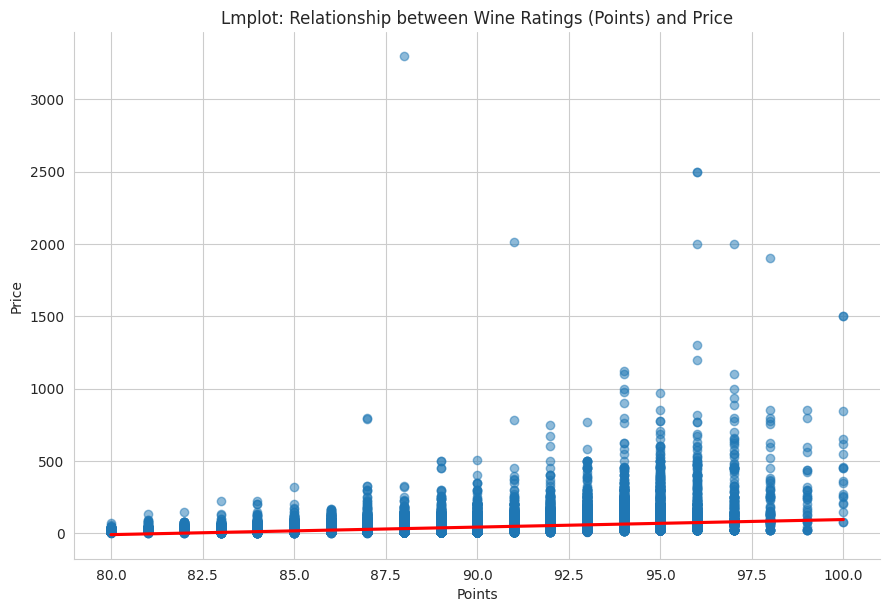

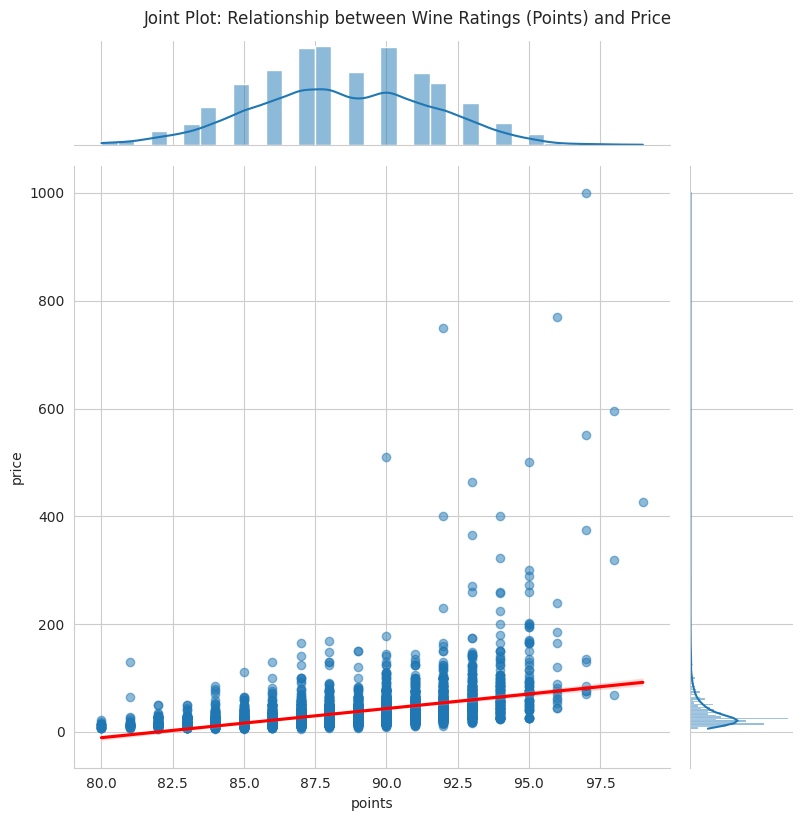

In [12]:
# Lmplot (Linear Model Plot) for relationship between points and price
lmplot_fig = sns.lmplot(data=wine_reviews, x='points', y='price', height=6, aspect=1.5, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
lmplot_fig.ax.set_title('Lmplot: Relationship between Wine Ratings (Points) and Price')
plt.xlabel('Points')
plt.ylabel('Price')

# Joint Plot for relationship between points and price
joint_fig = sns.jointplot(data=wine_reviews.sample(5000, random_state=42), x='points', y='price', kind='reg', height=8, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
joint_fig.fig.suptitle('Joint Plot: Relationship between Wine Ratings (Points) and Price', y=1.02)

plt.show()

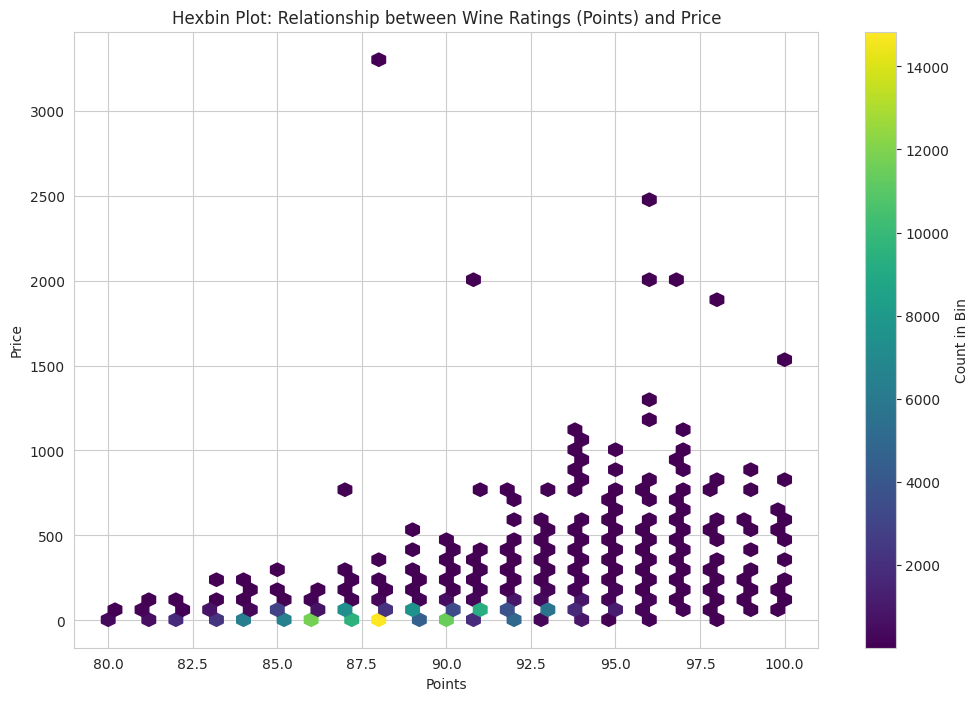

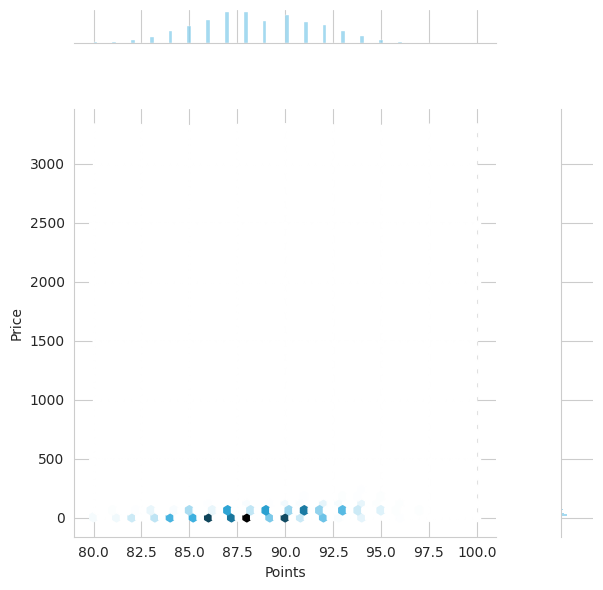

In [13]:
# Hexbin plot for relationship between points and price
plt.figure(figsize=(12, 8))
hb = plt.hexbin(wine_reviews['points'], wine_reviews['price'], gridsize=50, cmap='viridis', mincnt=1)
plt.colorbar(hb).set_label('Count in Bin')
plt.title('Hexbin Plot: Relationship between Wine Ratings (Points) and Price')
plt.xlabel('Points')
plt.ylabel('Price')
plt.show()

sns.set_palette("gist_rainbow_r")
sns.jointplot(x=wine_reviews['points'], y=wine_reviews['price'], kind='hex', color='skyblue', space=2)
plt.xlabel('Points')
plt.ylabel('Price')
plt.show()

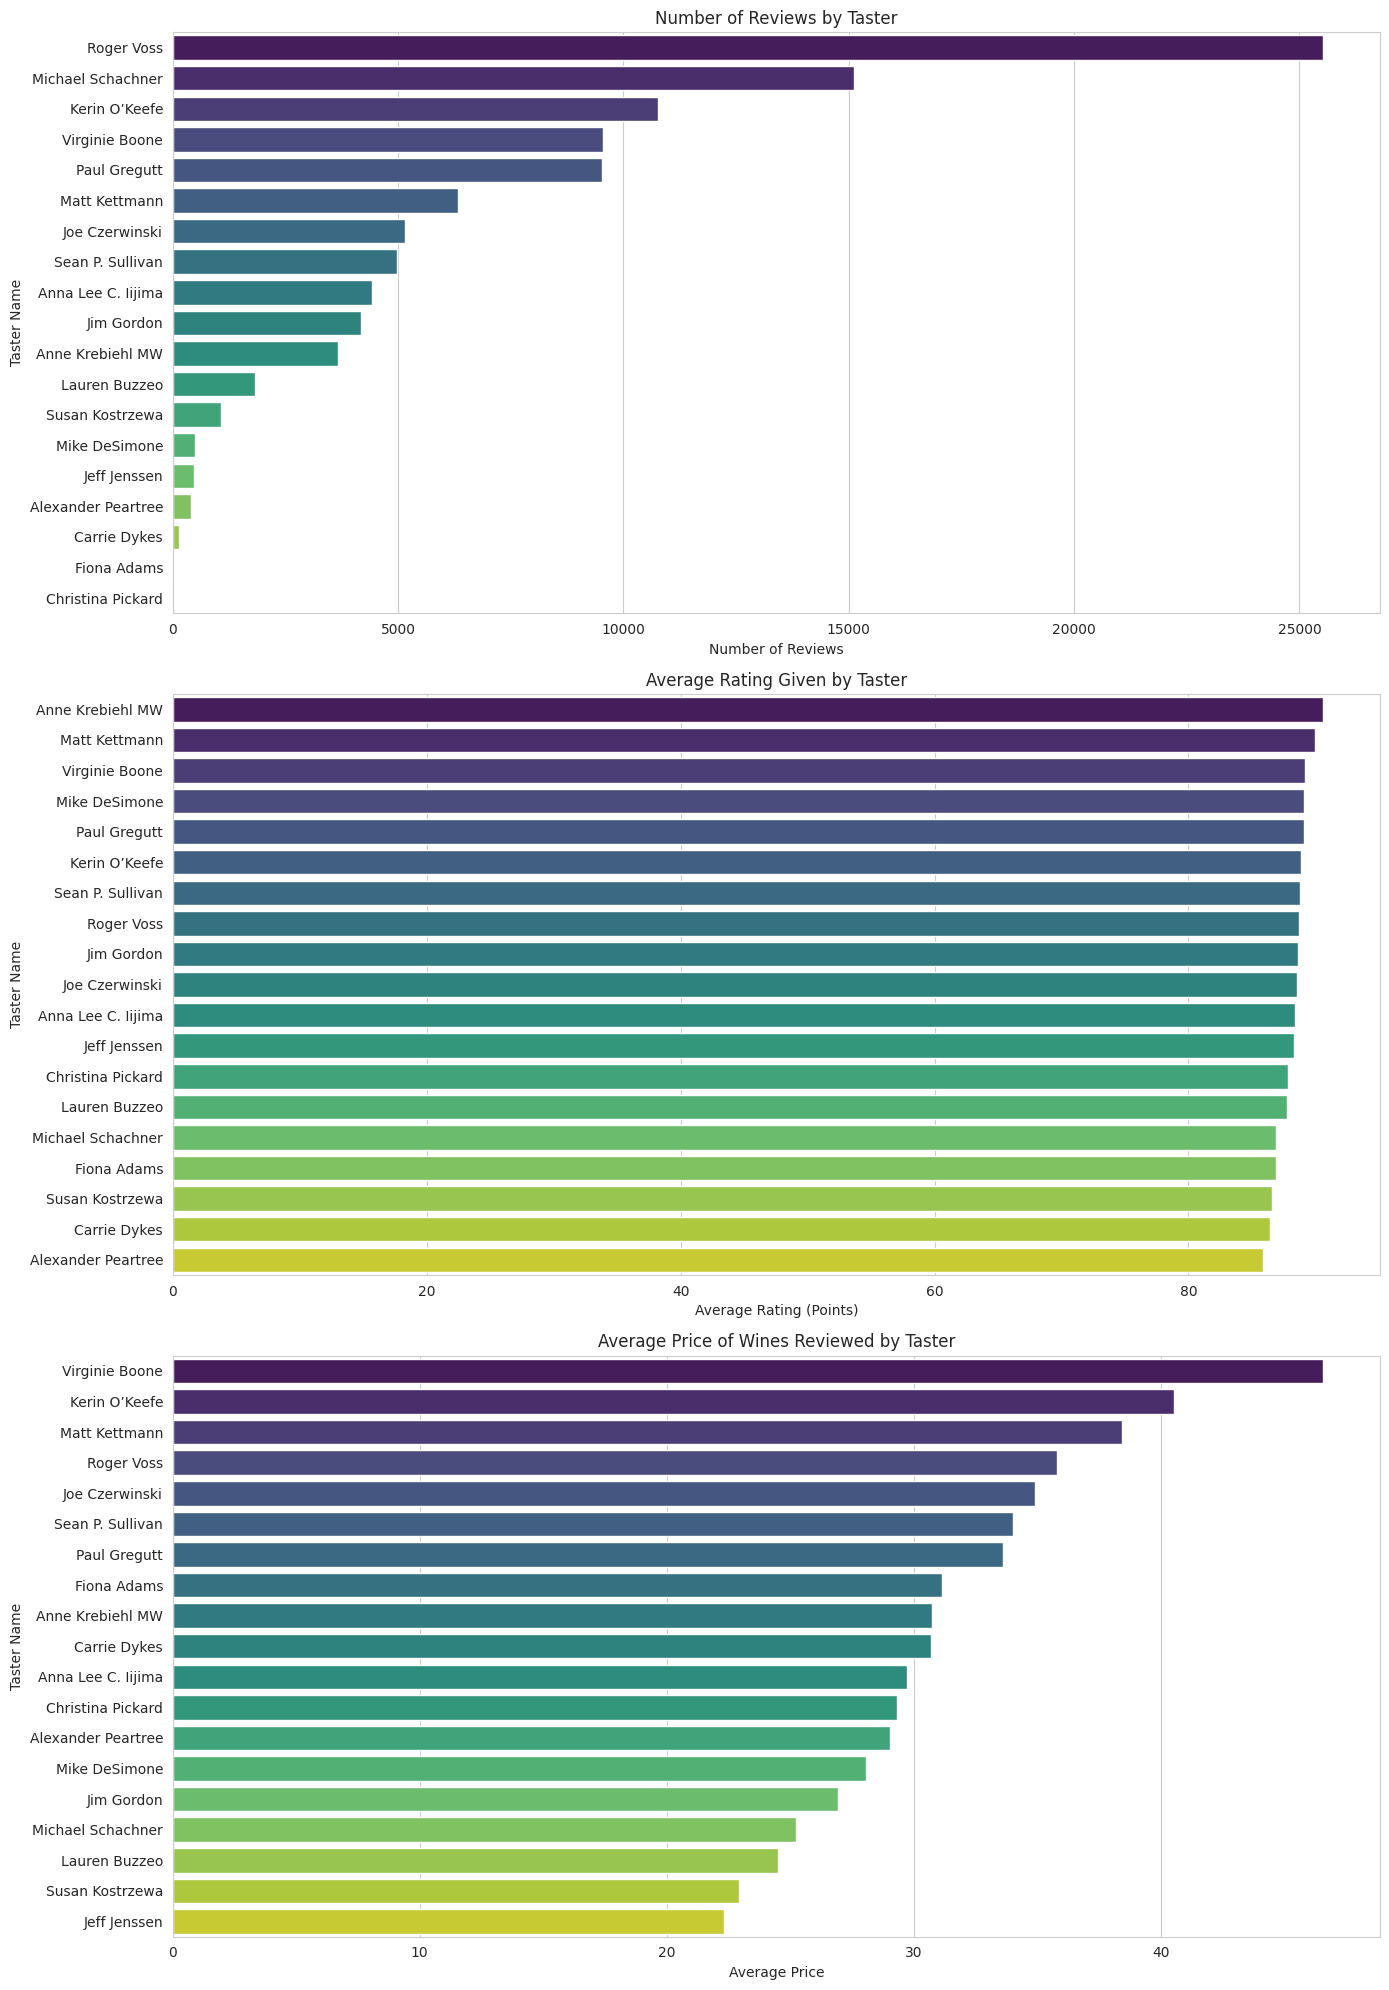

In [14]:
fig, ax = plt.subplots(3, 1, figsize=(14, 20))

# 7.1 Tasters' Influence
tasters_count = wine_reviews['taster_name'].value_counts()
sns.barplot(y=tasters_count.index, x=tasters_count.values, ax=ax[0], palette='viridis')
ax[0].set_title('Number of Reviews by Taster')
ax[0].set_xlabel('Number of Reviews')
ax[0].set_ylabel('Taster Name')

# 7.2 Average Rating by Taster
tasters_avg_points = wine_reviews.groupby('taster_name')['points'].mean().sort_values(ascending=False)
sns.barplot(y=tasters_avg_points.index, x=tasters_avg_points.values, ax=ax[1], palette='viridis')
ax[1].set_title('Average Rating Given by Taster')
ax[1].set_xlabel('Average Rating (Points)')
ax[1].set_ylabel('Taster Name')

# 7.3 Taster Preference for Price
tasters_avg_price = wine_reviews.groupby('taster_name')['price'].mean().sort_values(ascending=False)
sns.barplot(y=tasters_avg_price.index, x=tasters_avg_price.values, ax=ax[2], palette='viridis')
ax[2].set_title('Average Price of Wines Reviewed by Taster')
ax[2].set_xlabel('Average Price')
ax[2].set_ylabel('Taster Name')

plt.tight_layout()
plt.show()

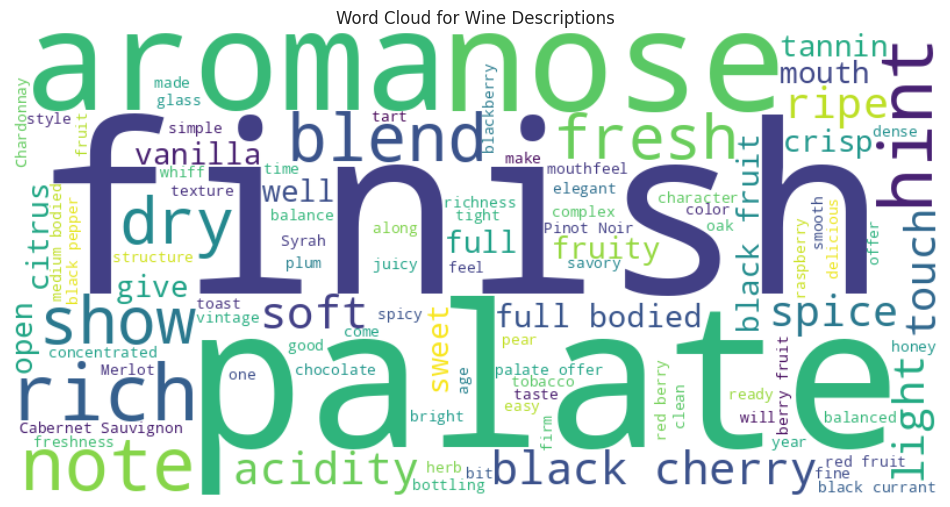

In [15]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Combine all the wine descriptions into one large text
all_descriptions = ' '.join(wine_reviews['description'])

# Set up stopwords (common words that don't carry significant meaning)
stopwords = set(STOPWORDS)
stopwords.update(["drink", "now", "wine", "flavor", "flavors"])  # adding wine-specific common words

# Generate the word cloud
wordcloud = WordCloud(stopwords=stopwords, background_color="white", max_words=100, width=800, height=400).generate(all_descriptions)

# Display the word cloud
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud for Wine Descriptions")
plt.show()

In [16]:
from collections import Counter
import re

def get_top_descriptors(text, n=10):
    """Return the top n words from a given text excluding stopwords."""
    words = re.findall(r'\w+', text.lower())
    filtered_words = [word for word in words if word not in stopwords and len(word) > 2]
    return Counter(filtered_words).most_common(n)

# Filter reviews for the variety "Pinot Noir"
pinot_noir_descriptions = ' '.join(wine_reviews[wine_reviews['variety'] == 'Pinot Noir']['description'])

# Get the top descriptors for "Pinot Noir"
pinot_noir_top_descriptors = get_top_descriptors(pinot_noir_descriptions, n=10)
pinot_noir_top_descriptors

[('cherry', 6123),
 ('fruit', 5599),
 ('pinot', 3975),
 ('acidity', 3579),
 ('red', 3525),
 ('tannins', 3202),
 ('finish', 2981),
 ('black', 2963),
 ('palate', 2764),
 ('raspberry', 2538)]

In [17]:
# Identify the top wine-producing regions based on the number of reviews
top_regions = wine_reviews['region_1'].value_counts().head(10)
top_regions

Napa Valley             4480
Columbia Valley (WA)    4124
Russian River Valley    3091
California              2629
Paso Robles             2350
Mendoza                 2301
Willamette Valley       2301
Alsace                  2163
Champagne               1613
Barolo                  1599
Name: region_1, dtype: int64

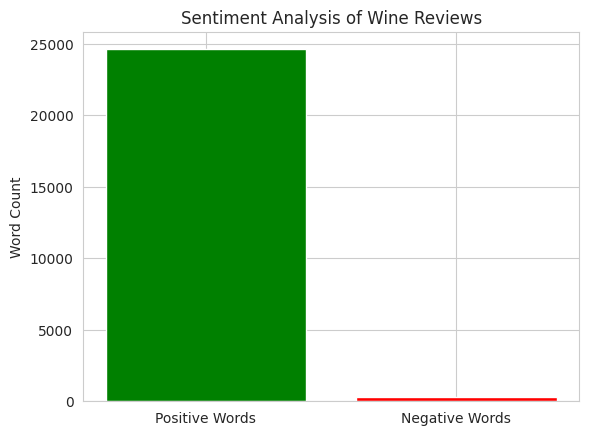

In [18]:
import re
from collections import Counter
import matplotlib.pyplot as plt

# Define lists of positive and negative words
positive_words = ["good", "great", "excellent", "best", "love", "lovely", "amazing", "pleasing", "favorite", "beautiful"]
negative_words = ["bad", "worst", "poor", "dislike", "hate", "unpleasant", "awful", "terrible"]

def count_sentiment_words(text):
    """Count the occurrences of positive and negative words in the text."""
    words = re.findall(r'\w+', text.lower())
    positive_count = sum(word in positive_words for word in words)
    negative_count = sum(word in negative_words for word in words)
    return positive_count, negative_count

# Tokenize the wine descriptions and count the occurrences of positive and negative words
wine_reviews['positive_count'], wine_reviews['negative_count'] = zip(*wine_reviews['description'].map(count_sentiment_words))

# Aggregate the counts for visualization
positive_sum = wine_reviews['positive_count'].sum()
negative_sum = wine_reviews['negative_count'].sum()

# Visualization
labels = ['Positive Words', 'Negative Words']
values = [positive_sum, negative_sum]
plt.bar(labels, values, color=['green', 'red'])
plt.title('Sentiment Analysis of Wine Reviews')
plt.ylabel('Word Count')
plt.show()


In [22]:
from IPython.core.display import display, HTML
import pandas as pd
def create_json_from_csv():
    # Extract columns 'points' and 'price', drop NaN values, and sample for performance
    selected_data = wine_reviews[['points', 'price']].dropna().sample(1000, random_state=42)

    # Convert the data to JSON format
    data_json = selected_data.to_json(orient='records')

    return data_json

scatter_data_json = create_json_from_csv()

# D3.js code for the scatter plot
d3_code = """
<!DOCTYPE html>
<meta charset="utf-8">

<script src="https://d3js.org/d3.v6.min.js"></script>

<div id="scatter-plot"></div>

<script>
    // Sample data structure
    // Assuming data is in the format: [{"points": 85, "price": 15.0}, ...]

    var data = JSON.parse('""" + scatter_data_json + """');

    // Set up SVG dimensions
    var margin = {top: 40, right: 20, bottom: 40, left: 50},
        width = 800 - margin.left - margin.right,
        height = 500 - margin.top - margin.bottom;

    // Set up scales
    var xScale = d3.scaleLinear()
        .domain([d3.min(data, d => d.points), d3.max(data, d => d.points)])
        .range([0, width]);

    var yScale = d3.scaleLinear()
        .domain([0, d3.max(data, d => d.price)])
        .range([height, 0]);

    // Create SVG
    var svg = d3.select("#scatter-plot")
        .append("svg")
        .attr("width", width + margin.left + margin.right)
        .attr("height", height + margin.top + margin.bottom)
        .append("g")
        .attr("transform", "translate(" + margin.left + "," + margin.top + ")");

    // Add circles for each data point
    svg.selectAll("circle")
        .data(data)
        .enter().append("circle")
        .attr("cx", d => xScale(d.points))
        .attr("cy", d => yScale(d.price))
        .attr("r", 3)
        .attr("fill", "skyblue");

    // Add X axis
    svg.append("g")
        .attr("transform", "translate(0," + height + ")")
        .call(d3.axisBottom(xScale));

    // Add Y axis
    svg.append("g")
        .call(d3.axisLeft(yScale));

    // Add X axis label
    svg.append("text")
        .attr("x", width/2)
        .attr("y", height + 35)
        .style("text-anchor", "middle")
        .text("Points");

    // Add Y axis label
    svg.append("text")
        .attr("transform", "rotate(-90)")
        .attr("x", -height/2)
        .attr("y", -40)
        .style("text-anchor", "middle")
        .text("Price");

    // Add chart title
    svg.append("text")
        .attr("x", width/2)
        .attr("y", -20)
        .style("text-anchor", "middle")
        .style("font-size", "16px")
        .style("font-weight", "bold")
        .text("Relationship between Wine Ratings (Points) and Price");

</script>
"""

# Displaying the D3.js scatter plot in the notebook
display(HTML(d3_code))
